# Imports

In [1]:
from matplotlib.patches import ConnectionPatch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.spatial.distance as dist

# Dynamic Programming Function

In [2]:
def dp(dist_mat):
    """
    Find minimum-cost path through matrix `dist_mat` using dynamic programming.

    The cost of a path is defined as the sum of the matrix entries on that
    path. See the following for details of the algorithm:

    - http://en.wikipedia.org/wiki/Dynamic_time_warping
    - https://www.ee.columbia.edu/~dpwe/resources/matlab/dtw/dp.m

    The notation in the first reference was followed, while Dan Ellis's code
    (second reference) was used to check for correctness. Returns a list of
    path indices and the cost matrix.
    """

    N, M = dist_mat.shape
    
    # Initialize the cost matrix
    cost_mat = np.zeros((N + 1, M + 1))
    for i in range(1, N + 1):
        cost_mat[i, 0] = np.inf
    for i in range(1, M + 1):
        cost_mat[0, i] = np.inf

    # Fill the cost matrix while keeping traceback information
    traceback_mat = np.zeros((N, M))
    for i in range(N):
        for j in range(M):
            penalty = [
                cost_mat[i, j],      # match (0)
                cost_mat[i, j + 1],  # insertion (1)
                cost_mat[i + 1, j]]  # deletion (2)
            i_penalty = np.argmin(penalty)
            cost_mat[i + 1, j + 1] = dist_mat[i, j] + penalty[i_penalty]
            traceback_mat[i, j] = i_penalty

    # Traceback from bottom right
    i = N - 1
    j = M - 1
    path = [(i, j)]
    while i > 0 or j > 0:
        tb_type = traceback_mat[i, j]
        if tb_type == 0:
            # Match
            i = i - 1
            j = j - 1
        elif tb_type == 1:
            # Insertion
            i = i - 1
        elif tb_type == 2:
            # Deletion
            j = j - 1
        path.append((i, j))

    # Strip infinity edges from cost_mat before returning
    cost_mat = cost_mat[1:, 1:]
    return (path[::-1], cost_mat)

# Univariate examples

## Example 1

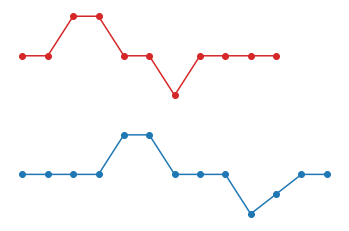

In [3]:
x = np.array([0, 0, 1, 1, 0, 0, -1, 0, 0, 0, 0])
y = np.array([0, 0, 0, 0, 1, 1, 0, 0, 0, -1, -0.5, 0, 0])

plt.figure(figsize=(6, 4))
plt.plot(np.arange(x.shape[0]), x + 1.5, "-o", c="C3")
plt.plot(np.arange(y.shape[0]), y - 1.5, "-o", c="C0")
plt.axis("off");

In [4]:
# Distance matrix
N = x.shape[0]
M = y.shape[0]
dist_mat = np.zeros((N, M))
for i in range(N):
    for j in range(M):
        dist_mat[i, j] = abs(x[i] - y[j])

In [5]:
dist_mat

array([[0. , 0. , 0. , 0. , 1. , 1. , 0. , 0. , 0. , 1. , 0.5, 0. , 0. ],
       [0. , 0. , 0. , 0. , 1. , 1. , 0. , 0. , 0. , 1. , 0.5, 0. , 0. ],
       [1. , 1. , 1. , 1. , 0. , 0. , 1. , 1. , 1. , 2. , 1.5, 1. , 1. ],
       [1. , 1. , 1. , 1. , 0. , 0. , 1. , 1. , 1. , 2. , 1.5, 1. , 1. ],
       [0. , 0. , 0. , 0. , 1. , 1. , 0. , 0. , 0. , 1. , 0.5, 0. , 0. ],
       [0. , 0. , 0. , 0. , 1. , 1. , 0. , 0. , 0. , 1. , 0.5, 0. , 0. ],
       [1. , 1. , 1. , 1. , 2. , 2. , 1. , 1. , 1. , 0. , 0.5, 1. , 1. ],
       [0. , 0. , 0. , 0. , 1. , 1. , 0. , 0. , 0. , 1. , 0.5, 0. , 0. ],
       [0. , 0. , 0. , 0. , 1. , 1. , 0. , 0. , 0. , 1. , 0.5, 0. , 0. ],
       [0. , 0. , 0. , 0. , 1. , 1. , 0. , 0. , 0. , 1. , 0.5, 0. , 0. ],
       [0. , 0. , 0. , 0. , 1. , 1. , 0. , 0. , 0. , 1. , 0.5, 0. , 0. ]])

Alignment cost: 0.5000
Normalized alignment cost: 0.0208


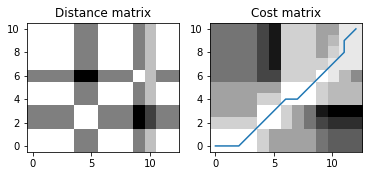

In [6]:
# DTW
path, cost_mat = dp(dist_mat)
print("Alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]))
print("Normalized alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]/(N + M)))

plt.figure(figsize=(6, 4))
plt.subplot(121)
plt.title("Distance matrix")
plt.imshow(dist_mat, cmap=plt.cm.binary, interpolation="nearest", origin="lower")
plt.subplot(122)
plt.title("Cost matrix")
plt.imshow(cost_mat, cmap=plt.cm.binary, interpolation="nearest", origin="lower")
x_path, y_path = zip(*path)
plt.plot(y_path, x_path);

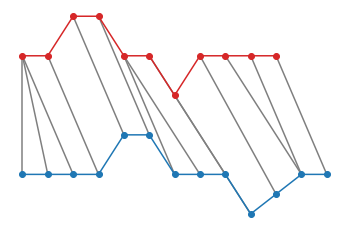

In [7]:
plt.figure()
for x_i, y_j in path:
    plt.plot([x_i, y_j], [x[x_i] + 1.5, y[y_j] - 1.5], c="C7")
plt.plot(np.arange(x.shape[0]), x + 1.5, "-o", c="C3")
plt.plot(np.arange(y.shape[0]), y - 1.5, "-o", c="C0")
plt.axis("off");

Alignment cost: 2.5000
Normalized alignment cost: 0.1042

Alignment cost: 1.7500
Normalized alignment cost: 0.0972

Alignment cost: 0.5000
Normalized alignment cost: 0.0208



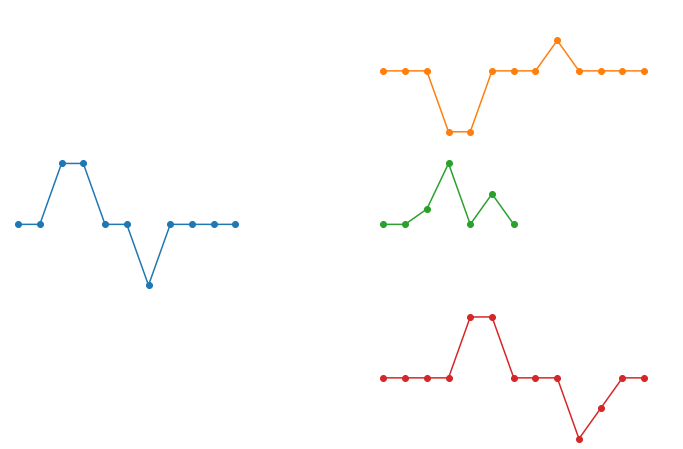

In [8]:
a = np.array([0, 0, 1, 1, 0, 0, -1, 0, 0, 0, 0])
b = np.array([0, 0, 0, 0, 1, 1, 0, 0, 0, -1, -0.5, 0, 0])
c = np.array([0, 0, 0, -1, -1, 0, 0, 0, 0.5, 0, 0, 0, 0])
d = np.array([0, 0, 0.25, 1, 0, 0.5, 0])

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(323)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(324)
ax4 = fig.add_subplot(326)
# fig = plt.figure(figsize=(6, 8))
ax1.plot(np.arange(a.shape[0]), a, "-o", c="C0")
ax2.plot(np.arange(c.shape[0]), c, "-o", c="C1")
ax3.plot(np.arange(d.shape[0]), d, "-o", c="C2")
ax4.plot(np.arange(b.shape[0]), b, "-o", c="C3")
for ax in [ax1, ax2, ax3, ax4]:
    ax.axis("off")
    ax.set_xlim([-0.5, 13.5])
    ax.set_ylim([-1.05, 1.05])
    
for cur_b in [c, d, b]:

    # Distance matrix
    N = a.shape[0]
    M = cur_b.shape[0]
    dist_mat = np.zeros((N, M))
    for i in range(N):
        for j in range(M):
    #         print(a[i], b[j], abs(a[i] - b[j]))
            dist_mat[i, j] = abs(a[i] - cur_b[j])

    # DTW
    path, cost_mat = dp(dist_mat)
    print("Alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]))
    print("Normalized alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]/(N + M)))
    print()

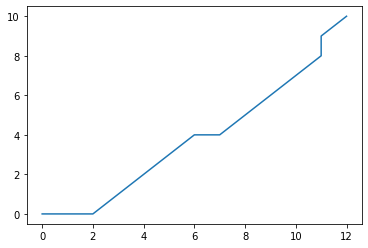

In [9]:
x_path, y_path = zip(*path)
plt.plot(y_path, x_path);

## Example 2

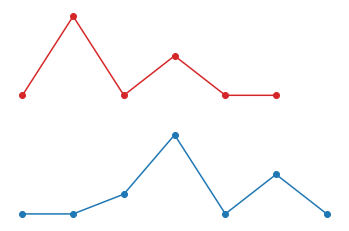

In [10]:
x = np.array([0, 2, 0, 1, 0, 0])
y = np.array([0, 0, 0.5, 2, 0, 1, 0])

plt.figure(figsize=(6, 4))
plt.plot(np.arange(x.shape[0]) + 1, x + 1.5, "-o", c="C3")
plt.plot(np.arange(y.shape[0]) + 1, y - 1.5, "-o", c="C0")
plt.axis("off");

Alignment cost: 0.5000
Normalized alignment cost: 0.0385


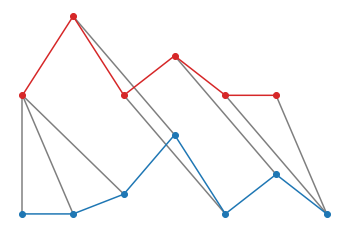

In [11]:
# Distance matrix
N = x.shape[0]
M = y.shape[0]
dist_mat = np.zeros((N, M))
for i in range(N):
    for j in range(M):
        dist_mat[i, j] = abs(x[i] - y[j])

# DTW
path, cost_mat = dp(dist_mat)
print("Alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]))
print("Normalized alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]/(N + M)))

# Plot alignment
plt.figure(figsize=(6, 4))
for x_i, y_j in path:
    plt.plot([x_i, y_j], [x[x_i] + 1.5, y[y_j] - 1.5], c="C7")
plt.plot(np.arange(x.shape[0]), x + 1.5, "-o", c="C3")
plt.plot(np.arange(y.shape[0]), y - 1.5, "-o", c="C0")
plt.axis("off");

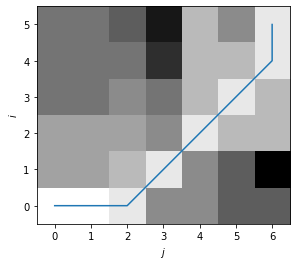

In [12]:
plt.figure(figsize=(6, 4))
plt.imshow(cost_mat, cmap=plt.cm.binary, interpolation="nearest", origin="lower")
x_path, y_path = zip(*path)
plt.plot(y_path, x_path)
plt.xlabel("$j$")
plt.ylabel("$i$");

## Example 3

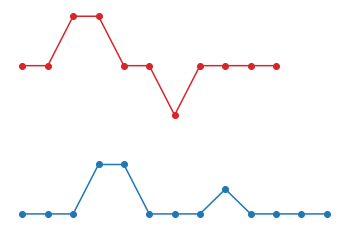

In [13]:
x = np.array([0, 0, 1, 1, 0, 0, -1, 0, 0, 0, 0])
y = np.array([0, 0, 0, 1, 1, 0, 0, 0, 0.5, 0, 0, 0, 0])

plt.figure(figsize=(6, 4))
plt.plot(np.arange(x.shape[0]), x + 1.5, "-o", c="C3")
plt.plot(np.arange(y.shape[0]), y - 1.5, "-o", c="C0")
plt.axis("off");

Alignment cost: 1.5000
Normalized alignment cost: 0.0625


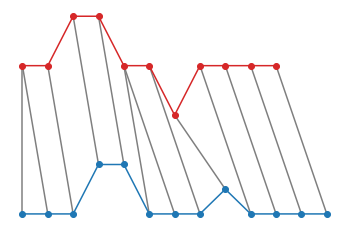

In [14]:
# Distance matrix
N = x.shape[0]
M = y.shape[0]
dist_mat = np.zeros((N, M))
for i in range(N):
    for j in range(M):
        dist_mat[i, j] = abs(x[i] - y[j])

# DTW
path, cost_mat = dp(dist_mat)
print("Alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]))
print("Normalized alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]/(N + M)))

# Plot alignment
plt.figure(figsize=(6, 4))
for x_i, y_j in path:
    plt.plot([x_i, y_j], [x[x_i] + 1.5, y[y_j] - 1.5], c="C7")
plt.plot(np.arange(x.shape[0]), x + 1.5, "-o", c="C3")
plt.plot(np.arange(y.shape[0]), y - 1.5, "-o", c="C0")
plt.axis("off");

# Personal Practice

In [15]:
from tslearn.utils import to_time_series
from tslearn.utils import to_time_series_dataset
from tslearn.datasets import UCR_UEA_datasets
from tslearn.utils import save_time_series_txt, load_time_series_txt
from tslearn.clustering import TimeSeriesKMeans

from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMinMax

In [16]:
# Load the Trace dataset
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")

In [17]:
X_train.shape

(100, 275, 1)

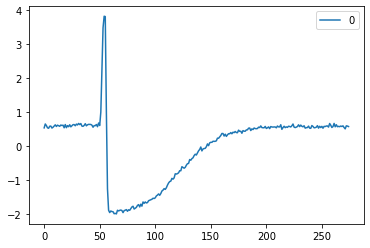

In [18]:
pd.DataFrame(X_train[0]).plot.line();

In [19]:
km = TimeSeriesKMeans(n_clusters=3, metric="dtw")

In [20]:
km.fit(X_train)

TimeSeriesKMeans(metric='dtw')

In [21]:
pred = km.predict(X_train)

In [22]:
np.unique(pred)

array([0, 1, 2], dtype=int64)

In [23]:
pred_idx = []

for i in range(4):
    pred_idx.append(np.where(pred == i))

In [24]:
pred_idx

[(array([ 1, 17, 23, 25, 28, 34, 37, 49, 52, 55, 56, 57, 58, 61, 65, 66, 70,
         72, 88, 96, 99], dtype=int64),),
 (array([ 2,  3,  5,  6,  9, 10, 11, 12, 13, 14, 16, 18, 19, 20, 21, 22, 26,
         27, 29, 32, 33, 40, 41, 42, 43, 44, 46, 47, 48, 50, 51, 54, 60, 62,
         63, 64, 68, 69, 71, 74, 75, 78, 79, 81, 83, 84, 85, 86, 90, 91, 92,
         94, 97], dtype=int64),),
 (array([ 0,  4,  7,  8, 15, 24, 30, 31, 35, 36, 38, 39, 45, 53, 59, 67, 73,
         76, 77, 80, 82, 87, 89, 93, 95, 98], dtype=int64),),
 (array([], dtype=int64),)]

In [25]:
for i in range(4):
    print(len(pred_idx[i][0]))

21
53
26
0


In [26]:
X_train_df = pd.DataFrame(X_train.squeeze())

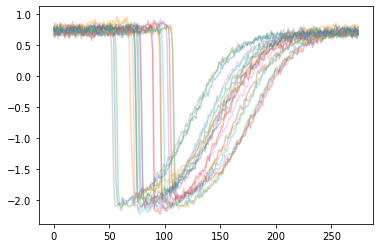

In [27]:
for idx in pred_idx[0][0]:
    X_train_df.iloc[idx, :].plot.line(alpha=0.3);

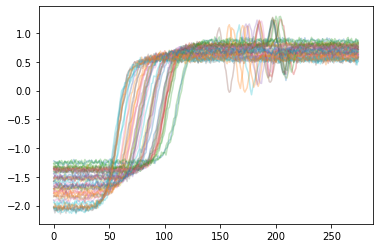

In [28]:
for idx in pred_idx[1][0]:
    X_train_df.iloc[idx, :].plot.line(alpha=0.3);

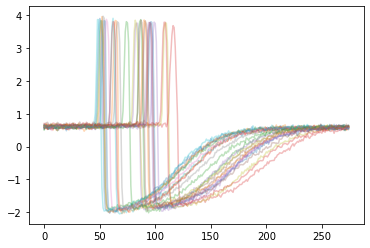

In [29]:
for idx in pred_idx[2][0]:
    X_train_df.iloc[idx, :].plot.line(alpha=0.3);

In [30]:
for idx in pred_idx[3][0]:
    X_train_df.iloc[idx, :].plot.line(alpha=0.3);